# Decision Tree Model

## Made By Jack

### Read libraries/data and subset

In [1]:
%%time

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn import tree

import shap
shap.initjs()
np.random.seed(1)

Wall time: 5.71 s


In [2]:
# read csv files (train/test/valid)
train_df = df = pd.read_csv("train_df.csv")
test_df = df = pd.read_csv("test_df.csv")
valid_df = df = pd.read_csv("valid_df.csv")

In [3]:
# split into X and y subsets
X_train = train_df.drop("is_corona_positive", axis=1)
X_test = test_df.drop("is_corona_positive", axis=1)
X_valid = valid_df.drop("is_corona_positive", axis=1)

y_train = train_df["is_corona_positive"]
y_test = test_df["is_corona_positive"]
y_valid = valid_df["is_corona_positive"]

### Create base model

In [4]:
%%time

# create decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# train the model
dt.fit(X_train, y_train)

# make predictions
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

Wall time: 261 ms


In [5]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     26055
           1       0.76      0.61      0.67      1416

    accuracy                           0.97     27471
   macro avg       0.87      0.80      0.83     27471
weighted avg       0.97      0.97      0.97     27471



In [6]:
print(confusion_matrix(y_test, y_pred_test))

[[25781   274]
 [  559   857]]


In [7]:
# metrics for test set
print("Accuracy for test: ", accuracy_score(y_test, y_pred_test))
print("F1 score for test: ", f1_score(y_test, y_pred_test, average = 'macro'))

Accuracy for test:  0.9696771140475411
F1 score for test:  0.8285250516738227


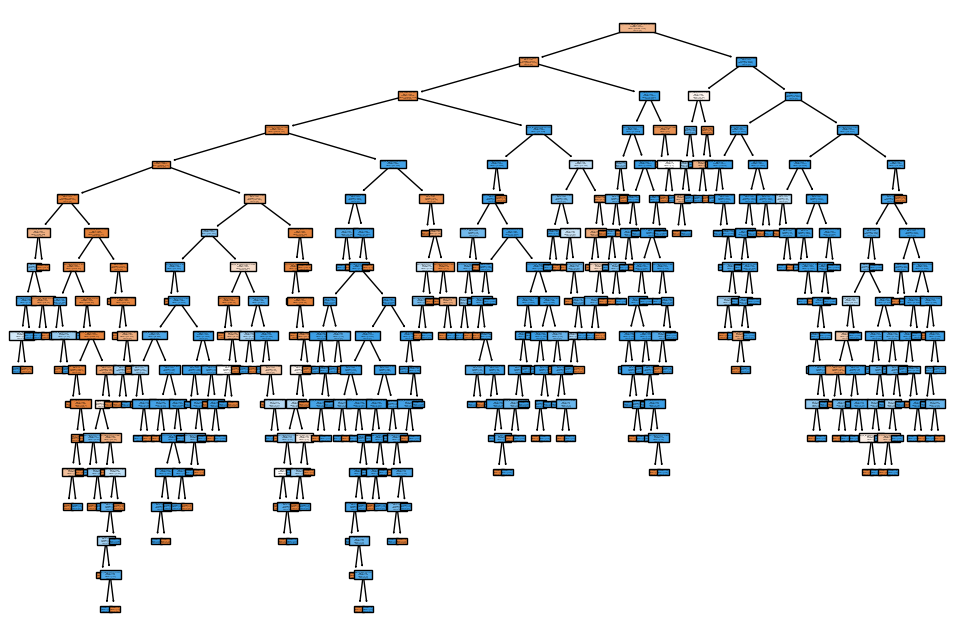

In [8]:
# visualise the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

### Grid Search

In [9]:
%%time

# create decision tree classifier
dt_valid = DecisionTreeClassifier()

# train the model
dt_valid.fit(X_valid, y_valid)

# make predictions
y_pred = dt_valid.predict(X_valid)

Wall time: 37.3 ms


In [10]:
%%time

# define hyperparameter grid
param_grid = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"]
}

# perform grid search
grid_search = GridSearchCV(estimator = dt_valid, param_grid = param_grid, cv=5)

# fit on training data
grid_search.fit(X_train, y_train)

Wall time: 3.27 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [11]:
# best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'splitter': 'best'}
Best Score: 0.9998538079822549


<u>Evaluation:</u>
 - The best hyperparameters are the default arguements
 - Other hyperparamters were not tested due to time constraints

In [12]:
# metrics for validation set
print("Accuracy for valid: ", accuracy_score(y_valid, y_pred))
print("F1 score for valid: ", f1_score(y_valid, y_pred, average = 'macro'))

Accuracy for valid:  0.9794685111030215
F1 score for valid:  0.8821814137390804


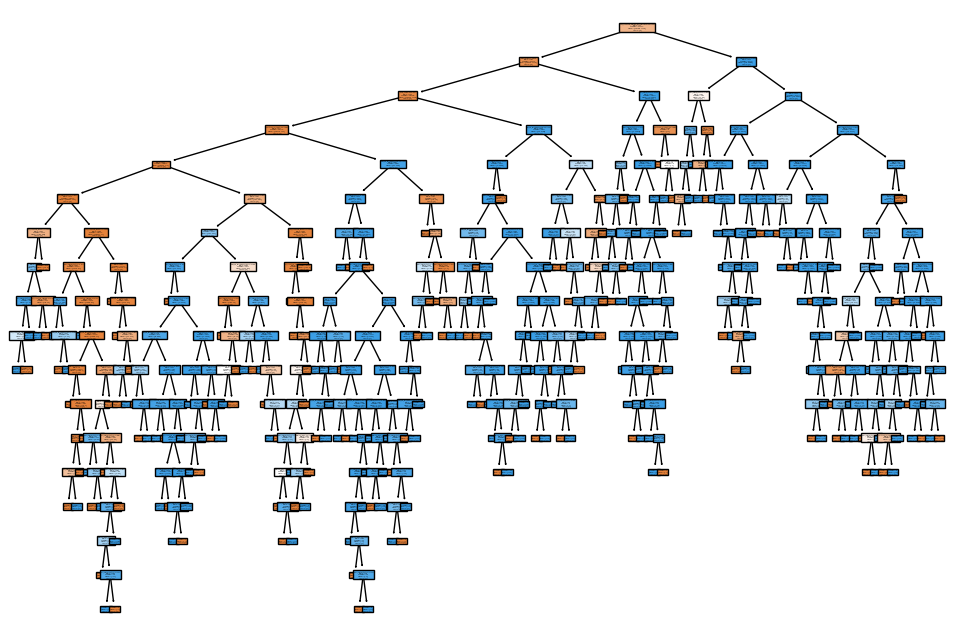

In [14]:
# define the best hyperparameters
best_hyperparams = grid_search.best_params_

# create the tuned decision tree classifier
dt_tuned = DecisionTreeClassifier(
    criterion=best_hyperparams['criterion'],
    splitter=best_hyperparams['splitter']
)

# train the tuned model on the training data
dt_tuned.fit(X_train, y_train)

# visualise the tuned decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_tuned, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()